# Algoritmo de Deutsch-Josza

`Problema de Deutsch-Josza` demonstrados de maneira clássica e quântica

## Contents

1. [Introduction](#introduction)     
   1.1 [Deutsch-Josza Problem](#djproblem)    
   1.2 [Deutsch-Josza Algorithm](#classical-solution)    
   1.3 [The Quantum Solution](#quantum-solution)    
   1.4 [Why Does This Work?](#why-does-this-work)     
2. [Worked Example](#example)
3. [Creating Quantum Oracles](#creating-quantum-oracles)     
4. [Qiskit Implementation](#implementation)  
   4.1 [Constant Oracle](#const_oracle)     
   4.2 [Balanced Oracle](#balanced_oracle)  
   4.3 [The Full Algorithm](#full_alg)     
   4.4 [Generalised Circuit](#general_circs)     
5. [Running on Real Devices](#device)    
6. [Problems](#problems)
7. [References](#references)

## 1. Introdução <a id='introduction'></a>

O algoritmo de Deutsch-Josza[1] foi o primeiro exemplo de algoritmo quântico com performance melhor que o algoritmo clássico. Será demonstrado as vantagens de usar o computador quântico para um problema específico.

### 1.1 Problema de Deutsch-Josza <a id='djproblem'> </a>

Seja uma função booleana $f$ que através de uma string de bits de entrada retorna $0$ ou $1$, ou seja,

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ ou } 1 \textrm{ , onde } x_n \textrm{ é } 0 \textrm{ ou } 1$$

Essa propriedade da função que garante dizer se ela é balanceada ou constante.

Uma `função constante` retorna sempre $0$ ou sempre $1$ para **qualquer** entrada. 

Já a `função balanceda` retorna $0$ para **metade** das entradas e $1$ para outra **metade**. O objetivo do problema é determinar se a dada função $f$ é balanceada ou constante.


### 1.2 Solução clássica <a id='classical-solution'> </a>

Classicamente, no melhor caso podemos determinar uma função balanceada se conseguirmos ambos casos tal que, $f(0,0,0,...)\rightarrow 0$ e $f(1,0,0,...) \rightarrow 1$, pois obtemos duas diferentes saídas.

E no pior caso, se as saídas continuarem dando o mesmo valor para cada entrada, é necessário testar a metade das entradas mais um para afirmarmos que a função é constante. Se o número total de entradas é $2^n$, precisa-se testar $2^{n-1}+1$ entradas para certificar o balanceamento da função. Por exemplo, para uma string de 4-bits, checando 9 das 16 possibilidades certificamos o balanceamento da função neste caso. Expressando a probabilidade da função $f$ ser constante como função das $k$ entradas temos que 


$$ P_\textrm{cte}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } k \leq 2^{n-1}$$


### 1.3 Solução quântica <a id='quantum-solution'> </a>

Utilizando um computado quântico é possível resolver esse problema após somente **uma** chamada da função $f$ através de um `quantum oracle`. Esse oracle mapeia a o estado $\vert x\rangle \vert y\rangle $ em $ \vert x\rangle \vert y \oplus f(x)\rangle$, onde $\oplus$ é uma adição módulo $2$. O circuito genérico do algoritmo de Deutsh-Josza está representado abaixo.


![image1](https://qiskit.org/textbook/ch-algorithms/images/deutsch_steps.png)

**Destrinchando**

<ol>
   <li> Prepara dois registradores quânticos. O primeiro é um $n$-qubit inicializado em $|0\rangle$ e o segundo é um qubit  inicializado em $|1\rangle$:
        

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$
   </li>
    
    
   <li> Aplica uma porta Hadamard para cada qubit:
        

$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$
   </li>
   
    
   <li> Aplica o quantum oracle $\vert x\rangle \vert y\rangle$ para $\vert x\rangle \vert y \oplus f(x)\rangle$:
       
       
$$          \begin{aligned}
            \lvert \psi_2 \rangle  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle ) 
        \end{aligned}
$$
       
desde que para cada $x,f(x)$ é ou $0$ oru $1$.
   </li>

    
   <li> Neste ponto o segundo qubit registrador pode ser ignorado. Aplicando a porta Hadamard em cada qubit do primeiro registrador:
       
       
$$        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                    \vert y \rangle
        \end{aligned}
$$
       
onde $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ é a soma do produto de bit a bit.
   </li>

   <li> Enfim faz-se a medição no primeiro registrador. Vale ressaltar que a probabilidade de medir $\vert 0 \rangle ^{\otimes n} = \lvert \dfrac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, que se torna $1$ se $f(x)$ é constante e $0$ se $f(x)$ é balanceada. 
   </li>

</ol>

### 1.4 Pq isso funciona? <a id='why-does-this-work'> </a>

- **Oracle constante**

No oracle constante não há efeito nos qubits de entrada e as portas quânticas antes e depois do mapeamento do oracle permanecem as mesmas. Desde que a porta Hadamard e seu próprio inverso, invertendo os passos 4 e 2, obtemos o estado quântico inicial de $|00\dots 0\rangle$ no primeiro registrador.


$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{após } U_f} \quad
H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
= 
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
$$

- **Oracle balanceado**

Após o passo 2, o registrador de entrada possui uma superposição igual para todos os estados da base computacional. Quando o oracle é balanceado, alterna-se a fase para negativa em metade dos estados:

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$


O estado quântico depois o mapeamento do oracle é ortogonal ao estado antes do mapeamento. Portanto, no passo 4, quando aplica-se a porta Hadamard, teremos o estado quântico ortogonal ao $|00\dots 0\rangle$. Isso significa que nunca mediremos o estado com todos os zeros. 


## 2. Worked Example  <a id='example'></a>

Let's go through a specfic example for a two bit balanced function, where we apply X-gates before both CNOTs.

<ol>
    <li> The first register of two qubits is initialized to $|00\rangle$ and the second register qubit to $|1\rangle$ 
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_1 \lvert 1 \rangle_2 $$

 
   </li>
    
   <li> Apply Hadamard on all qubits
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right)  $$

 
   </li>
    
   <li> The oracle function can be implemented as $\text{Q}_f = CX_{1a}CX_{2a}$, 
       $$
       \begin{align*}
            \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_1 \left( \lvert 0 \oplus 0 \oplus 0 \rangle_2 - \lvert 1 \oplus 0 \oplus 0 \rangle_2 \right) \\
                  + \lvert 0 1 \rangle_1 \left( \lvert 0 \oplus 0 \oplus 1 \rangle_2 - \lvert 1 \oplus 0 \oplus 1 \rangle_2 \right) \\
                  + \lvert 1 0 \rangle_1 \left( \lvert 0 \oplus 1 \oplus 0 \rangle_2 - \lvert 1 \oplus 1 \oplus 0 \rangle_2 \right) \\
                  + \lvert 1 1 \rangle_1 \left( \lvert 0 \oplus 1 \oplus 1 \rangle_2 - \lvert 1 \oplus 1 \oplus 1 \rangle_2 \right) \right]
        \end{align*}
        $$
   </li>
    
   <li>Thus
       $$
       \begin{aligned}
        \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_1 \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right) - \lvert 0 1 \rangle_1  \left( \lvert 0 \rangle_2 - \lvert  1 \rangle_2 \right) - \lvert 1 0 \rangle_1  \left( \lvert 0  \rangle_2 - \lvert 1 \rangle_2 \right) + \lvert 1 1 \rangle_1  \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right)  \right] \\
        & = \frac{1}{2} \left( \lvert 0 0 \rangle_1 - \lvert 0 1 \rangle_1 - \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right)  \\
        & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_{10} - \lvert 1 \rangle_{10} \right)\frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_{11} - \lvert 1 \rangle_{11} \right)\frac{1}{\sqrt{2}} \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right)
        \end{aligned}
        $$
   </li>
    
   <li> Apply Hadamard on the first register
        

$$ \lvert \psi_3\rangle = \lvert 1 \rangle_{10} \lvert 1 \rangle_{11}  \left( \lvert 0 \rangle_2 - \lvert 1 \rangle_2 \right) $$


   </li>
   
   <li> Measuring the first two qubits will give the non-zero $11$, indicating a balanced function.
   </li>
</ol>

You can try out similar examples using the widget below. Press the buttons to add H-gates and oracles, re-run the cell and/or set `case="constant"` to try out different oracles.

In [1]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size="small", case="balanced")

ModuleNotFoundError: No module named 'qiskit_textbook'

## 3. Creating Quantum Oracles <a id='creating-quantum-oracles'> </a>

Let's see some different ways we can create a quantum oracle. 

For a constant function, it is simple:

$\qquad$ 1. if f(x) = 0, then apply the $I$ gate to the qubit in register 2.  
$\qquad$ 2. if f(x) = 1, then apply the $X$ gate to the qubit in register 2.

For a balanced function, there are many different circuits we can create. One of the ways we can guarantee our circuit is balanced is by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:

![image2](images/deutsch_balanced1.svg)

In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which states give which output in the table below:

| States that output 0 | States that output 1 |
|:--------------------:|:--------------------:|
|          000         |          001         |
|          011         |          100         |
|          101         |          010         |
|          110         |          111         |


We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:

![other_balanced_circuit](images/deutsch_balanced2.svg)

| States that output 0 | States that output 1 |
|:--------------------:|:--------------------:|
|          001         |          000         |
|          010         |          011         |
|          100         |          101         |
|          111         |          110         |

## 4. Qiskit Implementation <a id='implementation'></a>

We now implement the Deutsch-Josza algorithm for the example of a three-bit function, with both constant and balanced oracles. First let's do our imports:

In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

Next, we set the size of the input register for our oracle:

In [3]:
# set the length of the n-bit input string. 
n = 3

### 4.1 Constant Oracle <a id='const_oracle'></a>
Let's start by creating a constant oracle, in this case the input has no effect on the ouput so we just randomly set the output qubit to be 0 or 1:

In [4]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

### 4.2 Balanced Oracle <a id='balanced_oracle'></a>

In [5]:
balanced_oracle = QuantumCircuit(n+1)

Next, we create a balanced oracle. As we saw in section 1b, we can create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. We can vary the input states that give 0 or 1 by wrapping some of the controls in X-gates. Let's first choose a binary string of length `n` that dictates which controls to wrap:

In [6]:
b_str = "101"

Now we have this string, we can use it as a key to place our X-gates. For each qubit in our circuit, we place an X-gate if the corresponding digit in `b_str` is `1`, or do nothing if the digit is `0`.

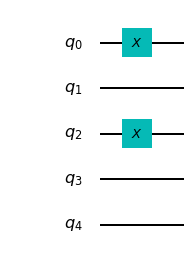

In [21]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw('mpl')

Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:

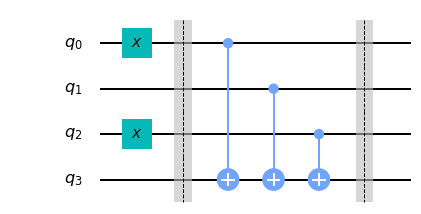

In [9]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

Finally, we repeat the code from two cells up to finish wrapping the controls in X-gates:

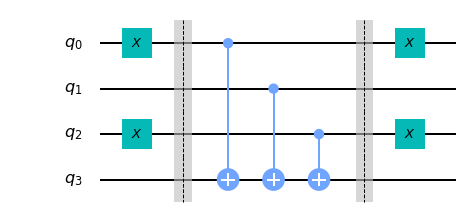

In [12]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

We have just created a balanced oracle! All that's left to do is see if the Deutsch-Joza algorithm can solve it.

### 4.3 The Full Algorithm <a id='full_alg'></a>

Let's now put everything together. This first step in the algorithm is to initialise the input qubits in the state $|{+}\rangle$ and the output qubit in the state $|{-}\rangle$:

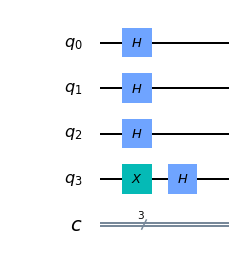

In [13]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

Next, let's apply the oracle. Here we apply the `balanced_oracle` we created above:

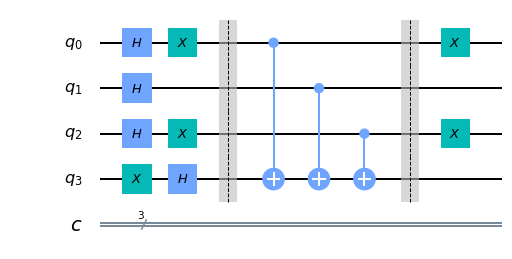

In [14]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw('mpl')

Finally, we perform H-gates on the $n$-input qubits, and measure our input register:

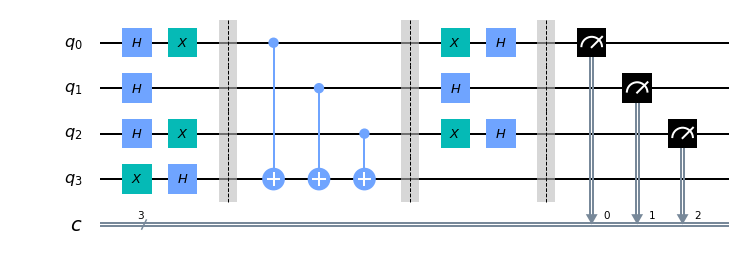

In [15]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

Let's see the output:

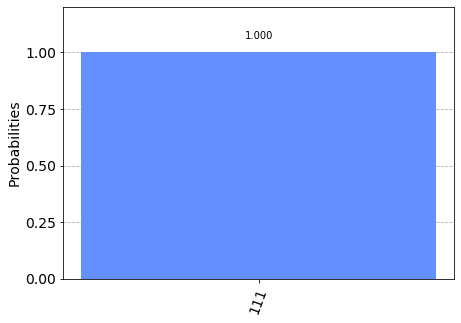

In [16]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

We can see from the results above that we have a 0% chance of measuring `000`. This correctly predicts the function is balanced. 

### 4.4 Generalised Circuits <a id='general_circs'></a>

Below, we provide a generalised function that creates Deutsch-Joza oracles and turns them into quantum gates. It takes the `case`, (either `'balanced'` or '`constant`', and `n`, the size of the input register:

In [17]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Let's also create a function that takes this oracle gate and performs the Deutsch-Joza algorithm on it:

In [18]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

Finally, let's use these functions to play around with the algorithm:

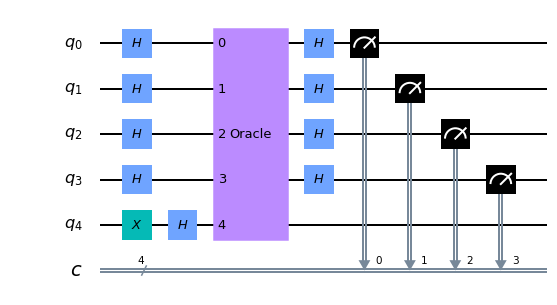

In [19]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

And see the results of running this circuit:

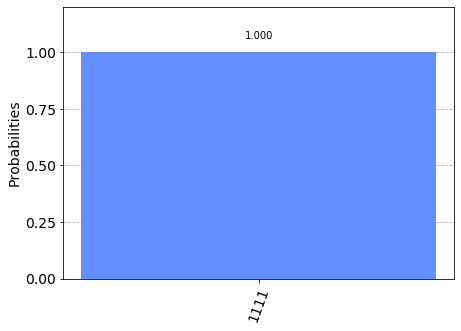

In [20]:
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

## 5. Experiment with Real Devices <a id='device'></a>

We can run the circuit on the real device as shown below. We first look for the least-busy device that can handle our circuit.

In [18]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_ourense


In [19]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


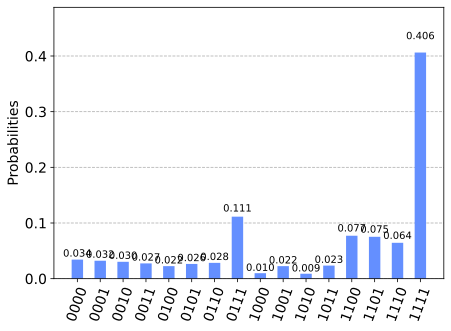

In [20]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

As we can see, the most likely result is `1111`. The other results are due to errors in the quantum computation. 

## 6. Problems <a id='problems'></a>

1. Are you able to create a balanced or constant oracle of a different form?

In [21]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)

2. The function `dj_problem_oracle` (shown above) returns a Deutsch-Joza oracle in the form of a gate, where the final qubit is the output qubit (as with the example oracles above). You can get different oracles by giving `dj_problem_oracle` different integers between 1 and 5. Use the Deutsch-Joza algorithm to decide whether each oracle is balanced or constant (**Note:** It is highly recommended you try this example using the `qasm_simulator` instead of a real device).

## 7. References <a id='references'></a>

1. David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558.  [doi:10.1098/rspa.1992.0167](https://doi.org/10.1098%2Frspa.1992.0167).
2. R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantum algorithms revisited". Proceedings of the Royal Society of London A. 454: 339–354. [doi:10.1098/rspa.1998.0164](https://doi.org/10.1098%2Frspa.1998.0164).

In [22]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.1',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.2'}